In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [23]:
np.random.seed(201707282)

n0,mu0,variance0 = 50,[10,11],20
data0 = multivariate_normal(mu0,np.eye(2)*variance0,n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

In [24]:
np.eye(2)*variance0 # 共分散行列をこうセットしているということは、２変数は独立としているということ

array([[ 20.,   0.],
       [  0.,  20.]])

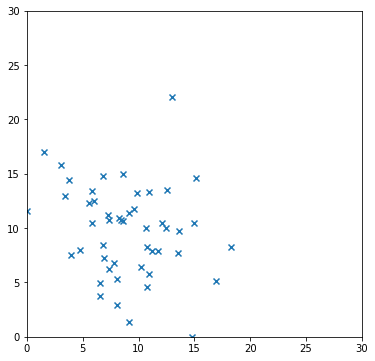

In [25]:
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim([0,30])
subplot.set_ylim([0,30])
subplot.scatter(data0[:,0],data0[:,1],marker='x')

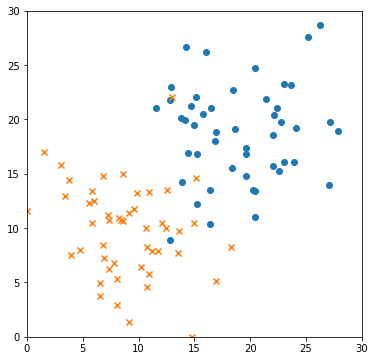

In [26]:
np.random.seed(20170728)

n0,mu0,variance0 = 50,[18,20],20
data1 = multivariate_normal(mu0,np.eye(2)*variance0,n0)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 1
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim([0,30])
subplot.set_ylim([0,30])
subplot.scatter(data1[:,0],data1[:,1],marker='o')
subplot.scatter(data0[:,0],data0[:,1],marker='x')

In [27]:
df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True) # ランダムに並べ替えして再番号付け

In [28]:
df

,x1,x2,t
0,16.824001,18.017389,1
1,22.066128,18.558780,1
2,8.581849,14.987916,0
3,14.976023,19.448439,1
4,7.228456,11.182759,0
5,23.010588,16.092417,1
6,8.074492,2.918351,0
7,6.027858,12.533804,0
8,18.254037,8.250108,0
9,20.282705,13.478920,1


In [29]:
permutation(df.index)

array([48, 20, 25, 31, 79, 83, 34, 86, 71, 36, 66, 97, 46, 44, 32, 11, 13,
       17, 82, 69, 57, 16, 92, 14, 99, 85, 19, 41, 96, 47, 35, 15, 77,  9,
       22, 29, 89,  7, 93, 84,  1, 81, 74, 28, 23, 39, 38, 54, 90, 75, 73,
       56, 67,  8,  0,  2, 21, 30, 12, 65, 64, 40, 98, 80, 95, 94,  5, 43,
       42, 49, 87, 52, 72, 59, 50, 60, 78,  3, 76,  4, 37, 53, 91, 62,  6,
       55, 10, 45, 18, 27, 24, 58, 33, 70, 88, 63, 51, 26, 68, 61], dtype=int64)

In [45]:
train_x = df[['x1','x2']].as_matrix()
train_t = df[['t']].as_matrix()

In [46]:
x = tf.placeholder(tf.float32,[None,2])
w = tf.Variable(tf.zeros([2,1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x,w) + w0
p = tf.sigmoid(f)

In [47]:
t = tf.placeholder(tf.float32,[None,1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
loss2 = tf.reduce_sum(tf.square(p-t))
train_step = tf.train.AdamOptimizer().minimize(loss)
train_step2  =  tf.train.AdamOptimizer().minimize(loss2)

In [48]:
correct_prediction = tf.equal(tf.sign(p-0.5),tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [49]:
sess = tf.Session()
#sess.run(tf.initialize_all_variables())   # 古い書き方
sess.run(tf.global_variables_initializer()) # 変数の初期化

In [50]:
times = 0
for _ in range(20000):
    times += 1
    sess.run(train_step, feed_dict={x:train_x,t:train_t})
    if times % 2000 == 0:
        loss_val,acc_val = sess.run([loss,accuracy], feed_dict={x:train_x,t:train_t})
        print('Steps: {0:d}, Loss: {1:f}, Accuracy: {2:f}'.format(times,loss_val,acc_val))

Steps: 2000, Loss: 41.550003, Accuracy: 0.890000
Steps: 4000, Loss: 29.718925, Accuracy: 0.940000
Steps: 6000, Loss: 22.866459, Accuracy: 0.960000
Steps: 8000, Loss: 18.708408, Accuracy: 0.960000
Steps: 10000, Loss: 16.149426, Accuracy: 0.960000
Steps: 12000, Loss: 14.588111, Accuracy: 0.960000
Steps: 14000, Loss: 13.665074, Accuracy: 0.960000
Steps: 16000, Loss: 13.154911, Accuracy: 0.960000
Steps: 18000, Loss: 12.910064, Accuracy: 0.960000
Steps: 20000, Loss: 12.824947, Accuracy: 0.960000


In [51]:
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print( w0_val, w1_val, w2_val )

-14.3438 0.645066 0.382782


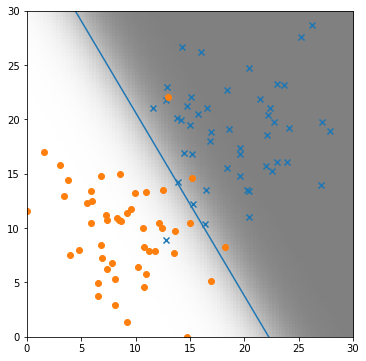

In [52]:
train_set0 = df[df['t']==0]
train_set1 = df[df['t']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0,30,10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val)
subplot.plot(linex, liney)

field = [[(1 / (1 + np.exp(-(w0_val + w1_val*x1 + w2_val*x2))))
          for x1 in np.linspace(0,30,100)]
         for x2 in np.linspace(0,30,100)]
subplot.imshow(field, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)

# 予測正解率の代わりに単純誤差を評価基準とした学習

In [53]:
sess = tf.Session()
#sess.run(tf.initialize_all_variables())   # 古い書き方
sess.run(tf.global_variables_initializer()) # 変数の初期化

予測正解率の代わりに単純誤差を評価基準とする(train_step → train_step2)

In [54]:
times = 0
for _ in range(20000):
    times += 1
    sess.run(train_step2, feed_dict={x:train_x,t:train_t})
    if times % 2000 == 0:
        loss_val,acc_val = sess.run([loss2,accuracy], feed_dict={x:train_x,t:train_t})
        print('Steps: {0:d}, Loss: {1:f}, Accuracy: {2:f}'.format(times,loss_val,acc_val))

Steps: 2000, Loss: 12.413401, Accuracy: 0.920000
Steps: 4000, Loss: 8.117838, Accuracy: 0.960000
Steps: 6000, Loss: 6.081060, Accuracy: 0.960000
Steps: 8000, Loss: 5.004556, Accuracy: 0.960000
Steps: 10000, Loss: 4.408652, Accuracy: 0.960000
Steps: 12000, Loss: 4.074916, Accuracy: 0.950000
Steps: 14000, Loss: 3.889331, Accuracy: 0.950000
Steps: 16000, Loss: 3.788468, Accuracy: 0.960000
Steps: 18000, Loss: 3.735834, Accuracy: 0.960000
Steps: 20000, Loss: 3.709971, Accuracy: 0.960000


In [55]:
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print( w0_val, w1_val, w2_val )

-13.4392 0.531808 0.445388


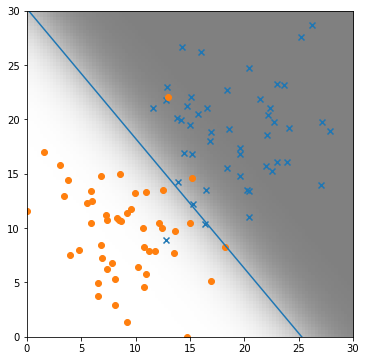

In [56]:
train_set0 = df[df['t']==0]
train_set1 = df[df['t']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0,30,10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val)
subplot.plot(linex, liney)

field = [[(1 / (1 + np.exp(-(w0_val + w1_val*x1 + w2_val*x2))))
          for x1 in np.linspace(0,30,100)]
         for x2 in np.linspace(0,30,100)]
subplot.imshow(field, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)